1. **Case study on Real-world Use Cases where ML model went badly wrong.**
2. **Perform Exploratory data analysis on structured, unstructured and image text data** 
3. **Explore result  visualization of post-hoc analysis methods:-**
    1. **Partial dependence plot(PDP)**
    2. **CNN:- layer-wise relevance propagation (LRP)( Guided backprop, Gradient CAM) Surrogate explainer**
4. **Explore result  visualization of post-hoc analysis methods:-**
    1. **Feature importance -sensitivity analysis**
    2. **Counter factual examples**
5. **Implementing Data Centric XAI approach**
6. **Investigate the interpretability of LIME local explanation on tabular, image and text data**
7. **Explore different types of SHAP on ML and DL  models  to explore local and global  explanations**
8. **Demonstrate the working of transformers using SHAP**

## 3. Result Visualization (Post - Hoc Analysis Methods)

### PDP

In [136]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

In [137]:
# Load California Housing Dataset
data = fetch_california_housing()
# Display Feature Names and Descriptions
print("Features in the California Housing Dataset:")
print(f"{'Feature Name':<15} Description")
print("="*50)
for name, desc in zip(data.feature_names, data.DESCR.split("\n")[12:20]):
    print(f"{name:<15} {desc.strip()}")

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

Features in the California Housing Dataset:
Feature Name    Description
MedInc          - MedInc        median income in block group
HouseAge        - HouseAge      median house age in block group
AveRooms        - AveRooms      average number of rooms per household
AveBedrms       - AveBedrms     average number of bedrooms per household
Population      - Population    block group population
AveOccup        - AveOccup      average number of household members
Latitude        - Latitude      block group latitude
Longitude       - Longitude     block group longitude


RandomForestRegressor(random_state=42)

<Figure size 3000x3000 with 0 Axes>

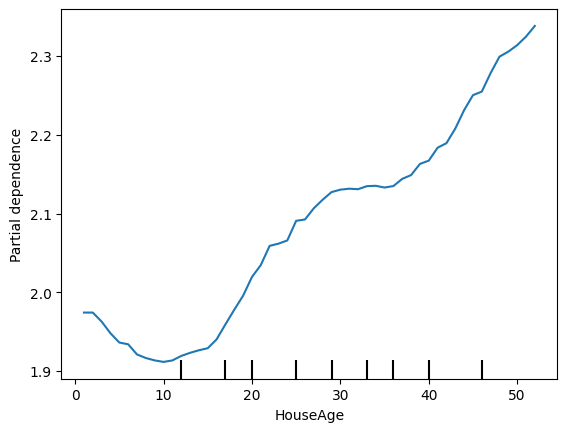

In [138]:
# Generate Partial Dependence Plot for a single feature
plt.figure(figsize=(30, 30))
PartialDependenceDisplay.from_estimator(model, X_train, ['HouseAge'])
# plt.title("PDP for Feature: Median Income (MedInc)")
plt.show()

<Figure size 800x600 with 0 Axes>

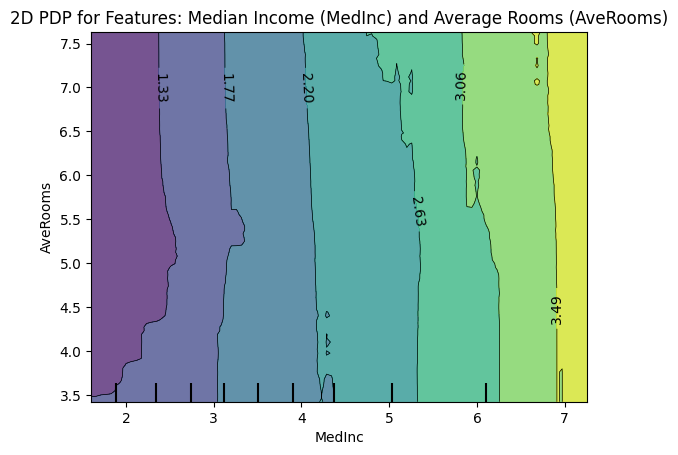

In [140]:
# Generate 2D Partial Dependence Plot for two interacting features
plt.figure(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(model, X_test, [("MedInc", "AveRooms")])
plt.title("2D PDP for Features: Median Income (MedInc) and Average Rooms (AveRooms)")
plt.show()

### CNN:- layer-wise relevance propagation (LRP)( Guided backprop, Gradient CAM) Surrogate explainer

In [67]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [133]:
# Load and normalize the data (with a validation split)
full_ds = tf.keras.utils.image_dataset_from_directory(
    'D:\SEM_6\XAI\LAB\image1',
    image_size=(28, 28),
    color_mode='grayscale',
    seed=123
).map(lambda x, y: (x / 255.0, y))

# Convert the dataset to numpy arrays
x_full, y_full = [], []
for images, labels in full_ds:
    x_full.append(images.numpy())
    y_full.append(labels.numpy())
x_full = np.concatenate(x_full, axis=0)
y_full = np.concatenate(y_full, axis=0)

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.3, random_state=42)

# Optional: Print the shape of the data to verify
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


Found 180 files belonging to 2 classes.
x_train shape: (126, 28, 28, 1)
y_train shape: (126,)
x_test shape: (54, 28, 28, 1)
y_test shape: (54,)


In [125]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [127]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
2/2 [==============================] - 2s 431ms/step - loss: 0.7447 - accuracy: 0.5575 - val_loss: 0.8238 - val_accuracy: 0.5385
Epoch 2/10
2/2 [==============================] - 0s 108ms/step - loss: 0.6428 - accuracy: 0.6106 - val_loss: 1.1020 - val_accuracy: 0.4615
Epoch 3/10
2/2 [==============================] - 0s 106ms/step - loss: 0.6800 - accuracy: 0.6106 - val_loss: 0.9205 - val_accuracy: 0.4615
Epoch 4/10
2/2 [==============================] - 0s 110ms/step - loss: 0.6037 - accuracy: 0.6283 - val_loss: 0.7992 - val_accuracy: 0.5385
Epoch 5/10
2/2 [==============================] - 0s 129ms/step - loss: 0.5786 - accuracy: 0.7168 - val_loss: 0.7911 - val_accuracy: 0.5385
Epoch 6/10
2/2 [==============================] - 0s 141ms/step - loss: 0.5884 - accuracy: 0.7080 - val_loss: 0.7892 - val_accuracy: 0.5385
Epoch 7/10
2/2 [==============================] - 0s 143ms/step - loss: 0.5687 - accuracy: 0.7168 - val_loss: 0.8112 - val_accuracy: 0.4615
Epoch 8/10
2/2 [====

#### Grad-CAM

In [128]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

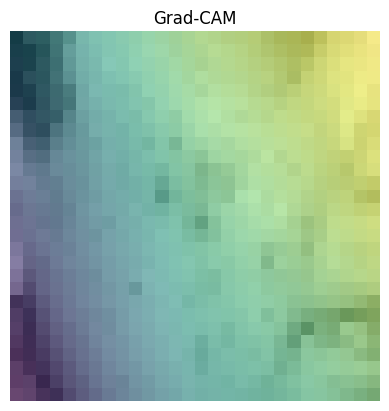

In [129]:
# Define the GradCAM object
# replace2linear = ReplaceToLinear()
gradcam = Gradcam(model, model_modifier=ReplaceToLinear())

# Select test image
image = x_test[0:1]
label = y_test[0]
score = CategoricalScore([label])

# Generate heatmap
cam = gradcam(score, image)  # auto-detects last conv layer
heatmap = cam[0]

# Plot result
plt.imshow(image[0], cmap='gray')
plt.imshow(heatmap,alpha=0.5)
plt.title("Grad-CAM")
plt.axis('off')
plt.show()

#### Guided Back Prop

In [130]:
from tf_keras_vis.utils.model_modifiers import GuidedBackpropagation
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.scores import CategoricalScore

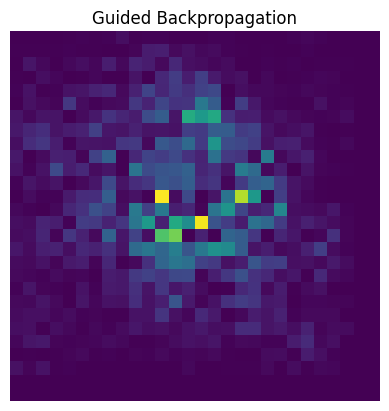

In [131]:
# Guided Backpropagation setup

saliency = Saliency(model, model_modifier=GuidedBackpropagation())

# Generate saliency map (Guided Backprop)
image = x_test[0:1]
score = CategoricalScore([y_test[0]])
gbp = saliency(score, image)

# Visualize
plt.imshow(np.abs(gbp[0].squeeze()), cmap='viridis')
plt.title("Guided Backpropagation")
plt.axis('off')
plt.show()

#### Layer-Wise relevance propagation

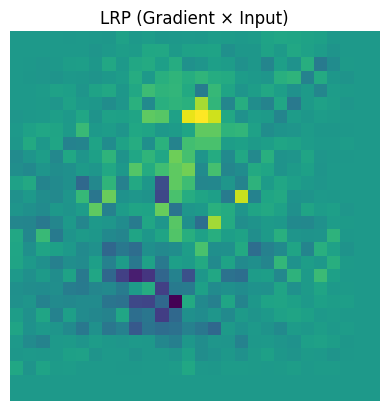

In [132]:
img = x_test[0]              # shape: (28, 28, 1)
img_batch = np.expand_dims(img, axis=0)

# Gradient × Input (Basic LRP approximation)
img_tensor = tf.convert_to_tensor(img_batch)

with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    preds = model(img_tensor)
    class_idx = tf.argmax(preds[0])
    loss = preds[0, class_idx]

# Compute gradients
grads = tape.gradient(loss, img_tensor)[0].numpy()  # shape: (28, 28, 1)

relevance = grads * img  # same shape


# Plot result
plt.imshow(relevance)
plt.title("LRP (Gradient × Input)")
plt.axis('off')
plt.show()

## 4. Explore result visualization of post-hoc analysis methods

### Feature importance -sensitivity analysis

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [105]:
# Load dataset
data = load_iris(as_frame=True)
df = data.frame
df['target'] = data.target

# Use only 2 classes for simplicity
df = df[df['target'].isin([0, 1])].reset_index(drop=True)

# Split data
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = RandomForestClassifier().fit(X_train, y_train)

<BarContainer object of 4 artists>

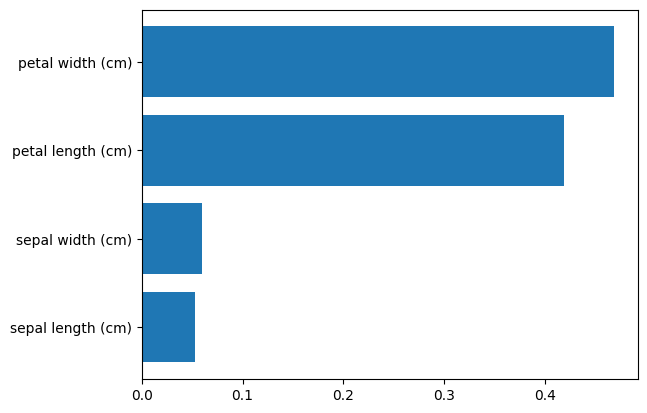

In [106]:
feat_imp=model.feature_importances_
feat=X.columns
plt.barh(feat,feat_imp)

### Counter factual examples

In [89]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [90]:
# Prepare dataset
data = load_iris(as_frame=True)
df = data.frame
df['target'] = data.target

# Use only 2 classes for simplicity
df = df[df['target'].isin([0, 1])].reset_index(drop=True)

# Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
import dice_ml
from dice_ml.utils import helpers

In [88]:
# Wrap in DiCE
d = dice_ml.Data(dataframe=df, continuous_features=X.columns.tolist(), outcome_name='target')
m = dice_ml.Model(model=model, backend='sklearn')

# Generate counterfactuals
explainer = dice_ml.Dice(d, m, method='random')
query_instance = pd.DataFrame([X_test.iloc[0]])

cf = explainer.generate_counterfactuals(query_instance, total_CFs=2, desired_class="opposite")
cf.visualize_as_dataframe(show_only_changes=True)

100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.43it/s]

Query instance (original outcome : 0)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.0,3.4,1.6,0.4,0



Diverse Counterfactual set (new outcome: 1)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-,3.6,-,1.7,1.0
1,-,-,5.1,1.6,1.0


## 5. Implementing Data Centric XAI approach

In [107]:
## NO DeepChecks So, no Data Centric For Model LAB

## 6. Investigate the interpretability of LIME local explanation on tabular, image and text data

### Tabular

In [144]:
import pandas as pd
import numpy as np
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset (download from Kaggle or GitHub and place locally)
df = pd.read_csv('Loan_Pred.csv')  # External dataset

# Simple preprocessing
df.dropna(inplace=True)
label_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [145]:
df.drop('Loan_ID',axis=1,inplace=True)
df=df.replace('3+',3).astype(int)
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = RandomForestClassifier().fit(X_train, y_train)

In [146]:
lime_exp=lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    training_labels=X_train.columns,
    mode='classification',
    class_names=['Approved','Not Approved']
)# LIME Explanation

exp=lime_exp.explain_instance(X_test.iloc[3].values,model.predict_proba)
exp.show_in_notebook()

C:\Users\saiha\anaconda3\envs\XAI_Env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Text data

In [147]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


# Load dataset
df = pd.read_csv('sms.tsv', sep='\t', header=None, names=['label', 'message'])

df['label'] = df['label'].map({'ham': 0, 'spam': 1})
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2)

# Pipeline
vectorizer = TfidfVectorizer()
model = LogisticRegression()
pipe = make_pipeline(vectorizer, model)
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [148]:
import lime.lime_text
# LIME Explanation
explainer = lime.lime_text.LimeTextExplainer(class_names=['Ham', 'Spam'])
exp = explainer.explain_instance(X_train.iloc[5], pipe.predict_proba)
exp.show_in_notebook()


### Image Data

In [153]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

model = load_model('mobilenet_model.h5')  # Assume trained on cats vs dogs
img_path = 'lion.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_preprocessed = preprocess_input(np.expand_dims(img_array, axis=0))

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 407ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.003921569..1.0].


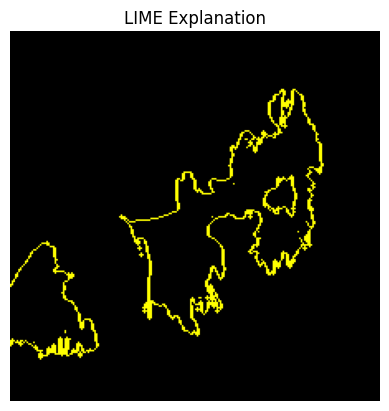

In [169]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    image=img_array,
    classifier_fn=model.predict,
    num_samples=10
)

# Show explanation for top label
temp,mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0]
)

plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title('LIME Explanation')
plt.axis('off')
plt.show()

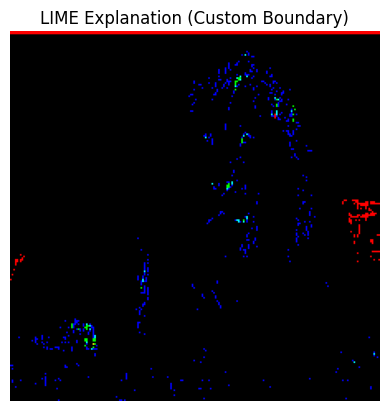

In [167]:

def draw_boundaries(image, mask):
    boundaries = ndimage.binary_dilation(mask) ^ mask  # Edges of mask
    outlined_image = image.copy()

    # Draw red boundary on image
    outlined_image[boundaries] = [255, 0, 0]  # Red outline

    return outlined_image

highlighted = draw_boundaries(temp, mask)

plt.imshow(highlighted.astype(np.uint8))
plt.title('LIME Explanation (Custom Boundary)')
plt.axis('off')
plt.show()

## 8. Demonstrate the working of transformers using SHAP

In [170]:
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
import shap

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
classifier = pipeline("sentiment-analysis", model=model_name)
explainer = shap.Explainer(classifier)

shap_values = explainer(["I love using SHAP with transformers"])
shap.plots.text(shap_values)


Device set to use cpu
